## 0.0 IMPORTS

In [1]:
# Imports
import joblib #salvar em disco
import pickle #salvar em disco

import numpy  as np #manipulação
import pandas as pd #manipulação

import seaborn                as sns #visualização
from matplotlib import pyplot as plt #visualização

import sklearn #framework machine learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model    import LogisticRegression
from sklearn.ensemble        import RandomForestClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC
from sklearn.metrics         import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics         import accuracy_score


%matplotlib inline


import warnings
warnings.filterwarnings("ignore")

### 0.1 Helper Functions

In [2]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.7


In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Camila D'Angelo" --iversions

Author: Camila D'Angelo

matplotlib: 3.5.2
pandas    : 1.4.2
seaborn   : 0.11.2
numpy     : 1.22.4
joblib    : 1.1.0
sklearn   : 0.24.2



## LOADING DATA

In [4]:
# Carrega os dados
dados = pd.read_csv('dados/dataset.csv')

In [5]:
# Check Shape
dados.shape

(583, 11)

In [6]:
# Check Colunas
dados.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [7]:
# Check amostra dos dados
dados.sample(10)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
346,46,Male,0.6,0.2,115,14,11,6.9,3.4,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
538,52,Male,1.8,0.8,97,85,78,6.4,2.7,0.70,1
478,33,Male,7.1,3.7,196,622,497,6.9,3.6,1.09,1
245,54,Male,0.9,0.2,290,15,18,6.1,2.8,0.80,1
207,40,Male,3.9,1.7,350,950,1500,6.7,3.8,1.30,1
567,52,Male,2.7,1.4,251,20,40,6.0,1.7,0.39,1
188,60,Male,1.9,0.8,614,42,38,4.5,1.8,0.60,1
377,20,Female,0.6,0.2,202,12,13,6.1,3.0,0.90,2
255,38,Male,1.7,0.7,859,89,48,6.0,3.0,1.00,1


## Análise Exploratória de Dados

In [8]:
# Check tipos de dados
dados.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [9]:
# Check Variáveis categóricas
dados.dtypes[dados.dtypes == 'object']

Gender    object
dtype: object

In [10]:
# Check Variáveis não categóricas
dados.dtypes[dados.dtypes != 'object']

Age                             int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

### Exploração das Variáveis Numéricas

In [11]:
dados.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


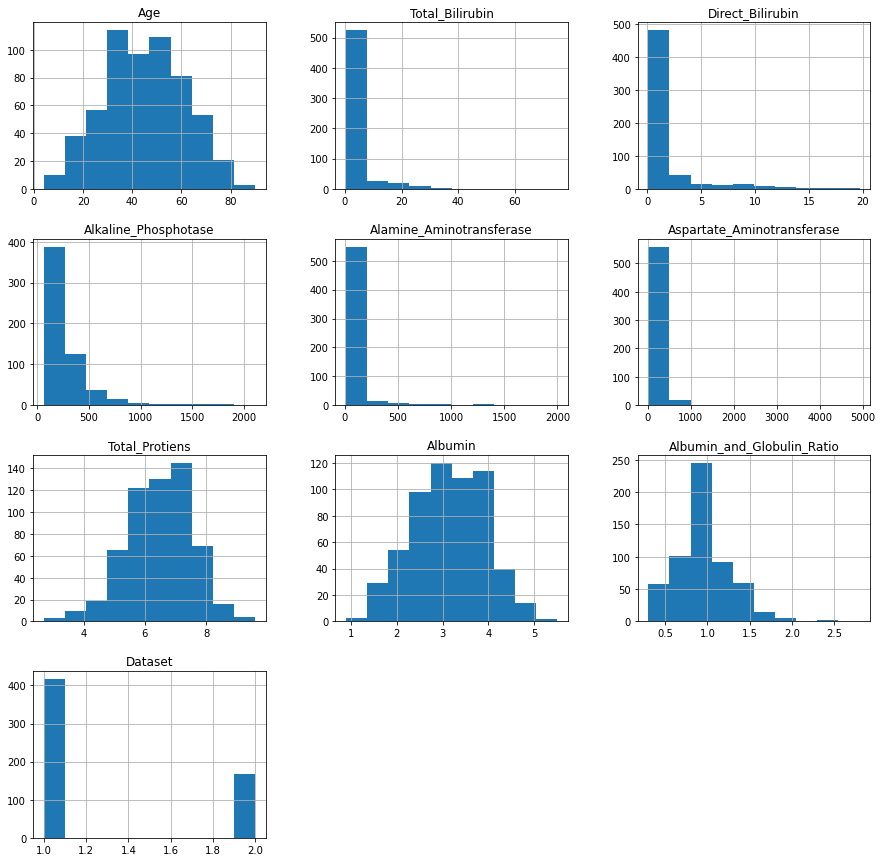

In [12]:
# Plot 
dados.hist(figsize = (15,15), bins = 10) 
plt.show()

> Análise

   * Aparentemente a variavél **age** segue uma distribuição normal;
   * Parece que há outlier nas variáveis **Alamine_Aminotransferase**, **Aspartate_Aminotransferase**, pois o valor máximo é muito mais alto que o valor médio.
    
   * A coluna **dataset** (variável target) tem duas classes:
       * '1' para doença hepática e 
       * '2' para nenhuma doença hepática.
       
    Vamos ajustar a variável colocando valores mais fáceis de interpretar. **A classe negativa (não tem a doença) será zero**.

> **Ajustando a variavél target**

In [13]:
# Função para ajustar a variável target
def ajusta_var(x):
    if x == 2:
        return 0
    return 1

In [14]:
# Aplica a função
dados['Dataset'] = dados['Dataset'].map(ajusta_var)

In [15]:
# Renomeando o nome da variável target
dados.rename({'Dataset':'Target'}, axis = 'columns', inplace = True)

In [16]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
529,55,Male,3.3,1.5,214,54,152,5.1,1.8,0.50,1
545,45,Female,0.7,0.2,153,41,42,4.5,2.2,0.90,0
477,55,Male,0.6,0.2,220,24,32,5.1,2.4,0.88,1
303,50,Male,0.7,0.2,206,18,17,8.4,4.2,1.00,0
317,35,Male,0.7,0.2,198,42,30,6.8,3.4,1.00,1


In [17]:
# Correlação entre as variáveis
dados.corr()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Total_Bilirubin,0.011763,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131
Target,0.137351,0.220208,0.246046,0.184866,0.163416,0.151934,-0.035008,-0.161388,-0.163131,1.000000


> **Análise**

* Variavél **age** apresenta baixa correlação com as demais variavéis, ou seja, não parece haver uma relação direta com as características que indicam a doença hepática;
   
* Variavél **Total_Bilirubin** apresenta 0.87 de correlação com a variavél **Direct_Bilirubin**. Correlação muito forte.  **Atenção multicolinearidade**. Analisar exclusão de uma das duas variavéis

* Variavél **Aspartate_Aminotransferase** apresenta 0.79 de correlação com a variavél **Alamine_Aminotransferase**.Correlação Forte. **Atenção multicolinearidade**

* Variavél **Total_Protiens** apresenta 0.78 de correlação com a variavél **Albumin**. Correlação Forte.  **Atenção multicolinearidade**

### Exploração da Variável Categórica

In [18]:
# Resumo da variavél categórica: contagem de frequência
dados.describe(include = ['object'])

,Gender
count,583
unique,2
top,Male
freq,441


Número de pacientes do sexo masculino:  441
Número de pacientes do sexo feminino:  142


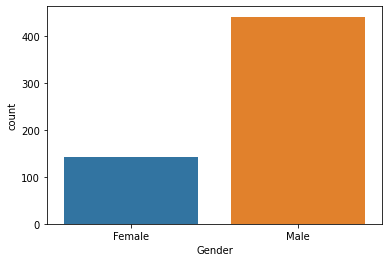

In [19]:
# Plot
sns.countplot(data = dados, x = 'Gender', label = 'Count')

# Value counts
M, F = dados['Gender'].value_counts()

# Print
print('Número de pacientes do sexo masculino: ', M)
print('Número de pacientes do sexo feminino: ', F)

> **Label Encoding**:  transformar a variável categórica em sua representação numérica 

In [20]:
# Função para label encoding
def encoding_func(x):
    if x == 'Male':
        return 0
    return 1

In [21]:
# Aplica a função
dados['Gender'] = dados['Gender'].map(encoding_func)

In [22]:
dados.sample(5)

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
89,60,0,4.0,1.9,238,119,350,7.1,3.3,0.80,1
434,30,1,0.7,0.2,194,32,36,7.5,3.6,0.92,0
552,45,0,0.6,0.1,196,29,30,5.8,2.9,1.00,1
524,29,0,0.8,0.2,156,12,15,6.8,3.7,1.10,0
10,57,0,0.6,0.1,210,51,59,5.9,2.7,0.80,1


### Verificando a Relação Entre Atributos

In [23]:
dados.corr()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Target
Age,1.000000,-0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.216408,0.137351
Gender,-0.056560,1.000000,-0.089291,-0.100436,0.027496,-0.082332,-0.080336,0.089121,0.093799,0.003424,-0.082416
Total_Bilirubin,0.011763,-0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206267,0.220208
Direct_Bilirubin,0.007529,-0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.200125,0.246046
Alkaline_Phosphotase,0.080425,0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.234166,0.184866
Alamine_Aminotransferase,-0.086883,-0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002375,0.163416
Aspartate_Aminotransferase,-0.019910,-0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.070040,0.151934
Total_Protiens,-0.187461,0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.234887,-0.035008
Albumin,-0.265924,0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.689632,-0.161388
Albumin_and_Globulin_Ratio,-0.216408,0.003424,-0.206267,-0.200125,-0.234166,-0.002375,-0.070040,0.234887,0.689632,1.000000,-0.163131


> Correlação **Total_Bilirubin** vs **Direct_Bilirubin** em relação a **varivaél Target**

* Relação positiva entre as duas variavéis, confirmando a multicolinearidade,sendo assim podemos remover uma das duas variaveis dos dados.
    
* Cor laranja (target=1=sim) tem representação quase que totalitaria no gráfico.

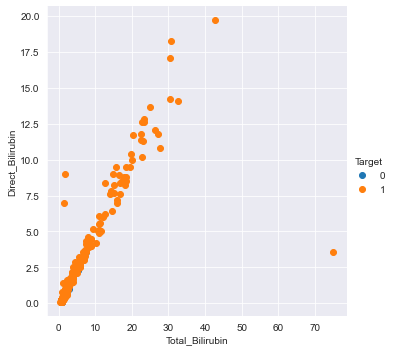

In [24]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

> Correlação **Total_Bilirubin** vs **Direct_Bilirubin** em relação a **varivaél gender**

* 0: Masculino
* 1: Feminino

    Padrão do relacionamento é o mesmo, ou seja, o sexo do paciente não parece ter uma relação direta com as duas variavéis

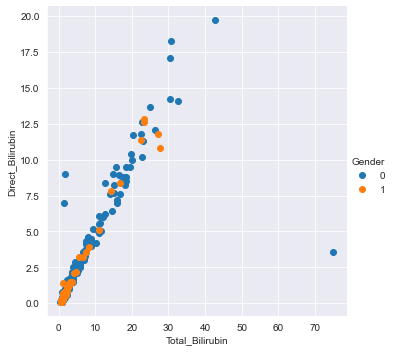

In [25]:
# Define o estilo do background
sns.set_style('darkgrid')  

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Direct_Bilirubin').add_legend()

> Correlação **Total_Bilirubin** vs **Albumin** em relação a **varivaél Target**

* Não parece haver uma correlação clara entre as duas variavéis

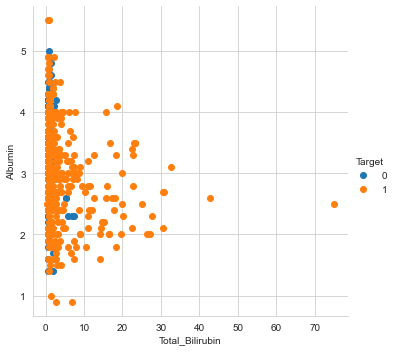

In [26]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Target', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()

> Correlação **Total_Bilirubin** vs **Albumin** em relação a **gender**

* Não parece haver uma correlação clara entre as duas variavéis

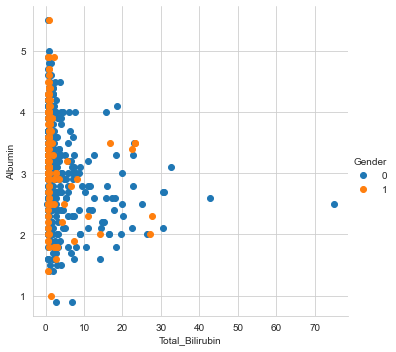

In [27]:
# Define o estilo do background
sns.set_style('whitegrid') 

# Facetgrid
sns.FacetGrid(dados, hue = 'Gender', size = 5).map(plt.scatter, 'Total_Bilirubin', 'Albumin').add_legend()